In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
pd.set_option('display.max_columns',None)

In [66]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [67]:
df.shape

(3543, 18)

In [68]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,13889.0,4,4,0,4.0,Old Property,3240.0,0,0,0,0,0,0,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,3,3,2,12.0,New Property,1950.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,3,3,3,16.0,Under Construction,1365.0,0,0,0,1,0,1,103
3,house,independent,sector 50,10.56,32593.0,5,5,3,3.0,Moderately Old,3240.0,0,1,0,0,0,0,20
4,house,not applicable,sector 11,2.20,12222.0,4,3,2,1.0,Old Property,1800.0,1,0,0,1,0,0,24


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3543 non-null   object 
 1   society          3543 non-null   object 
 2   sector           3543 non-null   object 
 3   price            3543 non-null   float64
 4   price_per_sqft   3543 non-null   float64
 5   bedRoom          3543 non-null   int64  
 6   bathroom         3543 non-null   int64  
 7   balcony          3543 non-null   object 
 8   floorNum         3543 non-null   float64
 9   agePossession    3543 non-null   object 
 10  built_up_area    3543 non-null   float64
 11  study room       3543 non-null   int64  
 12  servant room     3543 non-null   int64  
 13  store room       3543 non-null   int64  
 14  pooja room       3543 non-null   int64  
 15  others           3543 non-null   int64  
 16  furnishing_type  3543 non-null   int64  
 17  luxury_score  

In [70]:
train_df = df.drop(columns=['society','price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 28,4.50,4,4,0,4.0,Old Property,3240.0,0,0,0,0,0,0,0
1,flat,sector 66,2.80,3,3,2,12.0,New Property,1950.0,1,1,0,1,0,2,69
2,flat,sector 104,1.90,3,3,3,16.0,Under Construction,1365.0,0,0,0,1,0,1,103
3,house,sector 50,10.56,5,5,3,3.0,Moderately Old,3240.0,0,1,0,0,0,0,20
4,house,sector 11,2.20,4,3,2,1.0,Old Property,1800.0,1,0,0,1,0,0,24


In [73]:
df.floorNum.value_counts().sum()

3543

In [75]:
df.floorNum.value_counts().sort_index()

floorNum
0.0     125
1.0     326
2.0     498
3.0     471
4.0     271
5.0     162
6.0     181
7.0     175
8.0     194
9.0     161
10.0    177
11.0    112
12.0    157
13.0     39
14.0    112
15.0     80
16.0     51
17.0     46
18.0     36
19.0     33
20.0     26
21.0     16
22.0     13
23.0     14
24.0     11
25.0      9
26.0      5
27.0      8
28.0      4
29.0      3
30.0      5
31.0      3
32.0      2
33.0      4
34.0      2
35.0      2
38.0      1
39.0      2
40.0      1
43.0      2
44.0      1
45.0      1
51.0      1
Name: count, dtype: int64

## luxury score

<Axes: >

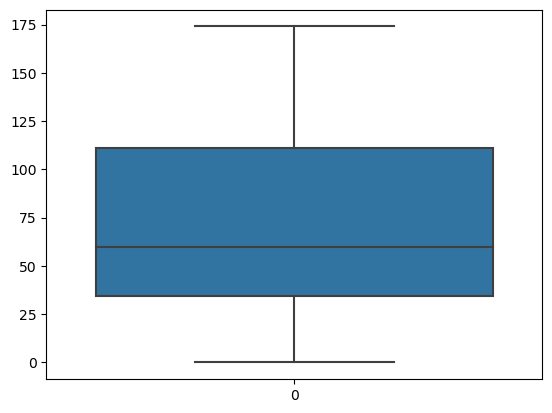

In [76]:
sns.boxplot(df['luxury_score'])

In [77]:
def category_luxury(score):
    if 0 <= score <50:
        return 'low'
    elif 50 <= score < 150:
        return 'medium'
    elif 150<= score <= 175:
        return 'high'
    else:
        return None

In [78]:
train_df['luxury_category'] = train_df['luxury_score'].apply(category_luxury)

In [79]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 28,4.50,4,4,0,4.0,Old Property,3240.0,0,0,0,0,0,0,0,low
1,flat,sector 66,2.80,3,3,2,12.0,New Property,1950.0,1,1,0,1,0,2,69,medium
2,flat,sector 104,1.90,3,3,3,16.0,Under Construction,1365.0,0,0,0,1,0,1,103,medium
3,house,sector 50,10.56,5,5,3,3.0,Moderately Old,3240.0,0,1,0,0,0,0,20,low
4,house,sector 11,2.20,4,3,2,1.0,Old Property,1800.0,1,0,0,1,0,0,24,low


## floorNum

<Axes: >

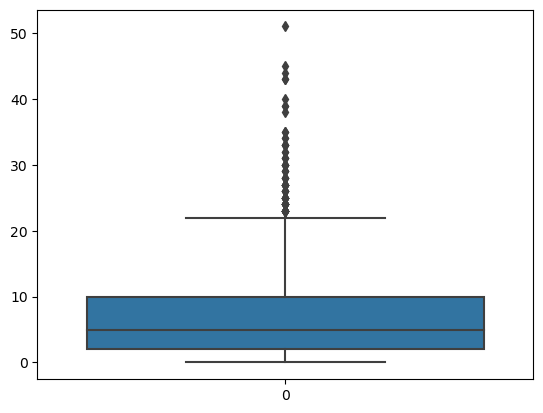

In [80]:
sns.boxplot(df.floorNum)

In [81]:
def category_floor(floor):
    if 0 <= floor <3:
        return 'low floor'
    elif 3 <= floor < 11:
        return 'mid floor'
    elif 11 <= floor <= 55:
        return 'high floor'
    else:
        return None

In [82]:
train_df['floor_category'] = train_df['floorNum'].apply(category_floor)

In [83]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 28,4.50,4,4,0,4.0,Old Property,3240.0,0,0,0,0,0,0,0,low,mid floor
1,flat,sector 66,2.80,3,3,2,12.0,New Property,1950.0,1,1,0,1,0,2,69,medium,high floor
2,flat,sector 104,1.90,3,3,3,16.0,Under Construction,1365.0,0,0,0,1,0,1,103,medium,high floor
3,house,sector 50,10.56,5,5,3,3.0,Moderately Old,3240.0,0,1,0,0,0,0,20,low,mid floor
4,house,sector 11,2.20,4,3,2,1.0,Old Property,1800.0,1,0,0,1,0,0,24,low,low floor


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3543 non-null   object 
 1   sector           3543 non-null   object 
 2   price            3543 non-null   float64
 3   bedRoom          3543 non-null   int64  
 4   bathroom         3543 non-null   int64  
 5   balcony          3543 non-null   object 
 6   floorNum         3543 non-null   float64
 7   agePossession    3543 non-null   object 
 8   built_up_area    3543 non-null   float64
 9   study room       3543 non-null   int64  
 10  servant room     3543 non-null   int64  
 11  store room       3543 non-null   int64  
 12  pooja room       3543 non-null   int64  
 13  others           3543 non-null   int64  
 14  furnishing_type  3543 non-null   int64  
 15  luxury_score     3543 non-null   int64  
 16  luxury_category  3543 non-null   object 
 17  floor_category

In [85]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [86]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 28,4.50,4,4,0,Old Property,3240.0,0,0,0,0,0,0,low,mid floor
1,flat,sector 66,2.80,3,3,2,New Property,1950.0,1,1,0,1,0,2,medium,high floor
2,flat,sector 104,1.90,3,3,3,Under Construction,1365.0,0,0,0,1,0,1,medium,high floor
3,house,sector 50,10.56,5,5,3,Moderately Old,3240.0,0,1,0,0,0,0,low,mid floor
4,house,sector 11,2.20,4,3,2,Old Property,1800.0,1,0,0,1,0,0,low,low floor


In [87]:
train_df_2=train_df.copy()

In [88]:
train_df_2.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 28,4.50,4,4,0,Old Property,3240.0,0,0,0,0,0,0,low,mid floor
1,flat,sector 66,2.80,3,3,2,New Property,1950.0,1,1,0,1,0,2,medium,high floor
2,flat,sector 104,1.90,3,3,3,Under Construction,1365.0,0,0,0,1,0,1,medium,high floor
3,house,sector 50,10.56,5,5,3,Moderately Old,3240.0,0,1,0,0,0,0,low,mid floor
4,house,sector 11,2.20,4,3,2,Old Property,1800.0,1,0,0,1,0,0,low,low floor


In [89]:
train_df_2.drop(columns=['pooja room','others','study room'],inplace=True)

In [90]:
train_df_2.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,house,sector 28,4.50,4,4,0,Old Property,3240.0,0,0,0,low,mid floor
1,flat,sector 66,2.80,3,3,2,New Property,1950.0,1,0,2,medium,high floor
2,flat,sector 104,1.90,3,3,3,Under Construction,1365.0,0,0,1,medium,high floor
3,house,sector 50,10.56,5,5,3,Moderately Old,3240.0,1,0,0,low,mid floor
4,house,sector 11,2.20,4,3,2,Old Property,1800.0,0,0,0,low,low floor


In [91]:
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished
train_df_2['furnishing_type'] = df['furnishing_type'].replace({0.0:'unfurnished',1.0:'semifurnished',2.0:'furnished'})

In [92]:
train_df_2.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,house,sector 28,4.50,4,4,0,Old Property,3240.0,0,0,unfurnished,low,mid floor
1,flat,sector 66,2.80,3,3,2,New Property,1950.0,1,0,furnished,medium,high floor
2,flat,sector 104,1.90,3,3,3,Under Construction,1365.0,0,0,semifurnished,medium,high floor
3,house,sector 50,10.56,5,5,3,Moderately Old,3240.0,1,0,unfurnished,low,mid floor
4,house,sector 11,2.20,4,3,2,Old Property,1800.0,0,0,unfurnished,low,low floor


In [93]:
# exporting df = pd.read_csv('gurgaon_properties_post_feature_selection_v2.csv') because i need it in other file
train_df_2.to_csv('gurgaon_properties_post_feature_selection_v2.csv',index=False)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')


In [18]:
# apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform( data_label_encoded[[col]] )
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [19]:
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop(['price'],axis=1) #X_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,33.0,4,4,0.0,2.0,3240.0,0,0,0,0,0,0,1.0,2.0
1,0.0,74.0,3,3,2.0,1.0,1950.0,1,1,0,1,0,2,2.0,0.0
2,0.0,6.0,3,3,3.0,4.0,1365.0,0,0,0,1,0,1,2.0,0.0
3,1.0,57.0,5,5,3.0,0.0,3240.0,0,1,0,0,0,0,1.0,2.0
4,1.0,13.0,4,3,2.0,2.0,1800.0,1,0,0,1,0,0,1.0,1.0


In [20]:
y_label.head()

0     4.50
1     2.80
2     1.90
3    10.56
4     2.20
Name: price, dtype: float64

# Technique - 1 correlation analysis 

<Axes: >

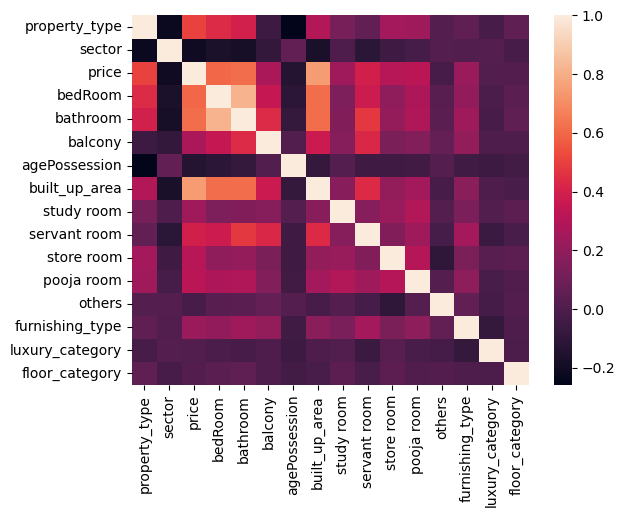

In [21]:
sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'][1:].to_frame().reset_index().rename(columns={'index':'feature', 'price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.204821
1,price,1.000000
2,bedRoom,0.597088
3,bathroom,0.611713
4,balcony,0.270540
5,agePossession,-0.136930
6,built_up_area,0.746152
7,study room,0.241392
8,servant room,0.392675
9,store room,0.311400


# Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf_label.fit(X_label , y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature' : X_label.columns,
    'rf_importance' : rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False )

fi_df2

,feature,rf_importance
6,built_up_area,0.642744
1,sector,0.107637
0,property_type,0.105973
2,bedRoom,0.027566
3,bathroom,0.024237
8,servant room,0.017710
5,agePossession,0.015772
4,balcony,0.012709
12,furnishing_type,0.010645
13,luxury_category,0.008200


# Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.662995
1,sector,0.106666
0,property_type,0.102474
2,bedRoom,0.043261
3,bathroom,0.036301
8,servant room,0.021344
9,store room,0.011641
5,agePossession,0.005458
7,study room,0.002740
12,furnishing_type,0.002181


# Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.687627
1,sector,0.152969
0,property_type,0.144838
8,servant room,0.011500
2,bedRoom,0.010632
3,bathroom,0.010177
4,balcony,0.002474
5,agePossession,0.000276
12,furnishing_type,0.000178
11,others,-0.000407


# Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha = 0.01 , random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature' : X_label.columns,
    'lasso_coeff' : lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)
fi_df5

,feature,lasso_coeff
6,built_up_area,1.472865
0,property_type,0.714878
3,bathroom,0.292643
9,store room,0.200883
7,study room,0.166339
12,furnishing_type,0.157411
8,servant room,0.153418
10,pooja room,0.066811
13,luxury_category,0.053597
2,bedRoom,0.006462


# Technique 6 - RFE

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE( estimator, n_features_to_select = X_label.shape[1], step= 1 )
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
print('support_',selector_label.support_,sep=' ')
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score', ascending=False)
fi_df6

support_ [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


,feature,rfe_score
6,built_up_area,0.646473
0,property_type,0.106362
1,sector,0.102799
2,bedRoom,0.027541
3,bathroom,0.023931
8,servant room,0.017950
5,agePossession,0.016419
4,balcony,0.012653
12,furnishing_type,0.010200
9,store room,0.008005


# Technique 7 - Linear Regression Weights

In [31]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lr = LinearRegression()

lr.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lr.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.475793
0,property_type,0.711683
3,bathroom,0.299676
9,store room,0.205197
7,study room,0.174561
12,furnishing_type,0.166400
8,servant room,0.162000
10,pooja room,0.070245
13,luxury_category,0.064374
2,bedRoom,0.008747


# Technique 8 - SHAP

In [32]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/aa/7c/eead607a358b2466b95b302e4a7eae717eeed53615653fbbd4c1527041b9/shap-0.48.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
    --------------------------------------- 10.2/544.4 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/544.4 kB 1.1 MB/s eta 0:00:01
   ---- ----------------------------------- 61.4/544.4 kB 1.1 MB/s eta 0:00:01
   -------- ----------------------------- 122.9/544.4 kB 804.6 kB/s eta 0:00:01
   ---------- --------------------------- 143.4/544.4 kB 778.5 kB/s eta 0:00:01
   ---------- --------------------------- 143.4/544.4 kB 778.5 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/544.

In [33]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 0.85737822,  0.17802419, -0.26127569, ..., -0.00865181,
        -0.03987483, -0.01333517],
       [-0.36282701,  0.65276324, -0.02940087, ...,  0.11533781,
        -0.00264244,  0.08610145],
       [-0.24382451, -0.07579978, -0.01784705, ...,  0.00534207,
        -0.00916474,  0.07971531],
       ...,
       [ 1.50574093,  0.67093705,  0.01561083, ..., -0.01264522,
        -0.02151154, -0.01237538],
       [-0.20157292, -0.53120184, -0.12183022, ..., -0.01419168,
        -0.00633424,  0.00993337],
       [-0.18471353,  0.30252678, -0.03735008, ..., -0.00494151,
        -0.00184748, -0.00946072]])

In [34]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.231291
0,property_type,0.471973
1,sector,0.384301
3,bathroom,0.112848
8,servant room,0.087232
2,bedRoom,0.062171
4,balcony,0.039992
12,furnishing_type,0.028272
5,agePossession,0.026210
14,floor_category,0.025440


In [35]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [36]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.204821,0.107637,0.106666,0.152969,-0.057702,0.102799,-0.066796,0.384301
bedRoom,0.597088,0.027566,0.043261,0.010632,0.006462,0.027541,0.008747,0.062171
bathroom,0.611713,0.024237,0.036301,0.010177,0.292643,0.023931,0.299676,0.112848
balcony,0.270540,0.012709,0.001597,0.002474,-0.045281,0.012653,-0.068636,0.039992
agePossession,-0.136930,0.015772,0.005458,0.000276,-0.002857,0.016419,-0.010274,0.026210
built_up_area,0.746152,0.642744,0.662995,0.687627,1.472865,0.646473,1.475793,1.231291
study room,0.241392,0.005151,0.002740,-0.001771,0.166339,0.005049,0.174561,0.015949
servant room,0.392675,0.017710,0.021344,0.011500,0.153418,0.017950,0.162000,0.087232
store room,0.311400,0.007651,0.011641,-0.001961,0.200883,0.008005,0.205197,0.016665


In [37]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.715168
sector             0.143610
bathroom           0.032166
bedRoom            0.030464
servant room       0.023859
agePossession      0.011023
balcony            0.010481
furnishing_type    0.007931
store room         0.007257
luxury_category    0.005321
study room         0.004027
floor_category     0.003841
pooja room         0.003255
others             0.001595
dtype: float64

In [40]:
# to drop floor_category, pooja room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,33.0,4,4,0.0,2.0,3240.0,0,0,0,0,0,0,1.0,2.0
1,0.0,74.0,3,3,2.0,1.0,1950.0,1,1,0,1,0,2,2.0,0.0
2,0.0,6.0,3,3,3.0,4.0,1365.0,0,0,0,1,0,1,2.0,0.0
3,1.0,57.0,5,5,3.0,0.0,3240.0,0,1,0,0,0,0,1.0,2.0
4,1.0,13.0,4,3,2.0,2.0,1800.0,1,0,0,1,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,0.0,109.0,2,1,2.0,1.0,511.0,0,0,0,0,0,0,2.0,2.0
3539,0.0,9.0,3,3,3.0,0.0,1713.0,0,0,0,0,0,1,2.0,2.0
3540,1.0,31.0,4,4,3.0,2.0,1350.0,0,0,1,0,0,0,1.0,1.0
3541,0.0,101.0,2,2,2.0,4.0,1390.0,0,0,0,0,0,0,1.0,0.0


In [41]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.8116506051248003

In [45]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'floor_category', 'others']), y_label, cv=5, scoring='r2')

In [46]:
scores.mean()

0.8148340333071079

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.812280181172898

In [47]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [48]:
export_df = X_label.drop(columns=['pooja room', 'floor_category', 'others'])
export_df['price'] = y_label
export_df.to_csv('gurgaon_properties_post_feature_selection_me.csv', index=False)

In [49]:
# exported two versions floor_category excluded and other study room excluded ( common pooja , others )